In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ls

drive/  sample_data/


In [ ]:
cd /content/drive/MyDrive/CNN

/content/drive/MyDrive/CNN


In [ ]:
pwd

'/content/drive/MyDrive/CNN'

In [8]:
##unzipping the zip file

!unzip Flowers-Dataset.zip

Archive:  Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg  
  infla

## Image Augmentation

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

In [11]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [12]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/CNN/flowers",target_size=(64,64),class_mode="categorical",batch_size=24)

Found 4317 images belonging to 5 classes.


In [13]:
x_test=test_datagen.flow_from_directory(r"/content/drive/MyDrive/CNN/flowers",target_size=(64,64),class_mode="categorical",batch_size=24)

Found 4317 images belonging to 5 classes.


In [ ]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

## Creating The Model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [15]:
model=Sequential()

## Adding The Layers

In [16]:
##Adding Convolution2D Layer

model.add(Convolution2D(32,(3,3),activation="relu",strides=(1,1),input_shape=(64,64,3)))

In [17]:
##Adding MaxPooling2D Layer

model.add(MaxPooling2D(pool_size=(2,2)))

In [18]:
##Adding Flatten Layer

model.add(Flatten())

In [19]:
##Adding Dense-(Hidden Layers) 

model.add(Dense(300,activation="relu"))
model.add(Dense(300,activation="relu"))

In [20]:
##Adding Output Layer

model.add(Dense(5,activation="softmax"))

In [21]:
##To see the added layers

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 300)               9225900   
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 5)                 1505      
                                                        

## Compiling The Model

In [22]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

## Fitting The Model

In [23]:
len(x_train)

180

In [24]:
model.fit(x_train,epochs=10,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test))

Epoch 1/10
180/180 [==============================] - 70s 385ms/step - loss: 1.3201 - accuracy: 0.4612 - val_loss: 1.1006 - val_accuracy: 0.5661
Epoch 2/10
180/180 [==============================] - 69s 386ms/step - loss: 1.0417 - accuracy: 0.5798 - val_loss: 1.0454 - val_accuracy: 0.5909
Epoch 3/10
180/180 [==============================] - 68s 376ms/step - loss: 0.9772 - accuracy: 0.6150 - val_loss: 0.9519 - val_accuracy: 0.6213
Epoch 4/10
180/180 [==============================] - 66s 369ms/step - loss: 0.9267 - accuracy: 0.6359 - val_loss: 0.8695 - val_accuracy: 0.6641
Epoch 5/10
180/180 [==============================] - 69s 384ms/step - loss: 0.8824 - accuracy: 0.6523 - val_loss: 0.8594 - val_accuracy: 0.6764
Epoch 6/10
180/180 [==============================] - 66s 368ms/step - loss: 0.8573 - accuracy: 0.6690 - val_loss: 0.8912 - val_accuracy: 0.6681
Epoch 7/10
180/180 [==============================] - 66s 369ms/step - loss: 0.8212 - accuracy: 0.6866 - val_loss: 0.8410 - val_ac

## Saving The Model

In [25]:
model.save('flowers.h5')

## Testing The Model

In [26]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [27]:
model=load_model('flowers.h5')

In [29]:
img=image.load_img(r"/content/drive/MyDrive/CNN/flowers/daisy/10172379554_b296050f82_n.jpg")

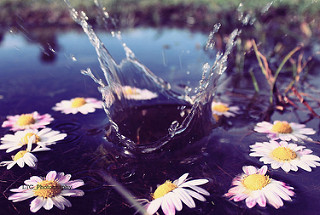

In [30]:
img

In [34]:
img=image.load_img(r"/content/drive/MyDrive/CNN/flowers/daisy/10172379554_b296050f82_n.jpg",target_size=(64,64))

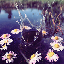

In [35]:
img

In [36]:
x=image.img_to_array(img)

In [37]:
x

array([[[120., 120., 108.],
        [ 97.,  87.,  88.],
        [109.,  99.,  98.],
        ...,
        [124., 136., 114.],
        [163., 172., 153.],
        [138., 143., 121.]],

       [[ 95.,  88.,  96.],
        [ 68.,  48.,  73.],
        [ 89.,  75.,  90.],
        ...,
        [132., 146., 133.],
        [112., 121., 104.],
        [113., 125., 105.]],

       [[ 89.,  76.,  94.],
        [ 83.,  70.,  87.],
        [ 83.,  77.,  87.],
        ...,
        [105., 104.,  99.],
        [112., 121., 104.],
        [105., 111.,  97.]],

       ...,

       [[ 22.,   7.,  38.],
        [ 23.,   8.,  39.],
        [ 22.,   3.,  31.],
        ...,
        [ 39.,  16.,  70.],
        [ 46.,  21.,  79.],
        [ 47.,  21.,  82.]],

       [[ 26.,  11.,  40.],
        [ 23.,   8.,  37.],
        [ 24.,  15.,  44.],
        ...,
        [ 38.,  17.,  73.],
        [ 42.,  18.,  76.],
        [ 45.,  19.,  80.]],

       [[ 24.,   8.,  37.],
        [ 26.,  10.,  39.],
        [ 26.,  

In [38]:
x=np.expand_dims(x,axis=0)

In [39]:
x

array([[[[120., 120., 108.],
         [ 97.,  87.,  88.],
         [109.,  99.,  98.],
         ...,
         [124., 136., 114.],
         [163., 172., 153.],
         [138., 143., 121.]],

        [[ 95.,  88.,  96.],
         [ 68.,  48.,  73.],
         [ 89.,  75.,  90.],
         ...,
         [132., 146., 133.],
         [112., 121., 104.],
         [113., 125., 105.]],

        [[ 89.,  76.,  94.],
         [ 83.,  70.,  87.],
         [ 83.,  77.,  87.],
         ...,
         [105., 104.,  99.],
         [112., 121., 104.],
         [105., 111.,  97.]],

        ...,

        [[ 22.,   7.,  38.],
         [ 23.,   8.,  39.],
         [ 22.,   3.,  31.],
         ...,
         [ 39.,  16.,  70.],
         [ 46.,  21.,  79.],
         [ 47.,  21.,  82.]],

        [[ 26.,  11.,  40.],
         [ 23.,   8.,  37.],
         [ 24.,  15.,  44.],
         ...,
         [ 38.,  17.,  73.],
         [ 42.,  18.,  76.],
         [ 45.,  19.,  80.]],

        [[ 24.,   8.,  37.],
       

In [40]:
pred=model.predict(x)

In [41]:
pred

array([[5.4211577e-19, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00]], dtype=float32)

In [48]:
x_test.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [43]:
index=['daisy','dandelion','rose','sunflower','tulip']

In [ ]:
index[np.argmax(pred)]